<a href="https://colab.research.google.com/github/MuhammadRezaPehlevi0218/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


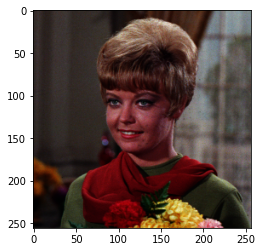

In [5]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Gamma Correction pada citra 
----------------------------------
Masukkan Nilai Gamma: 2


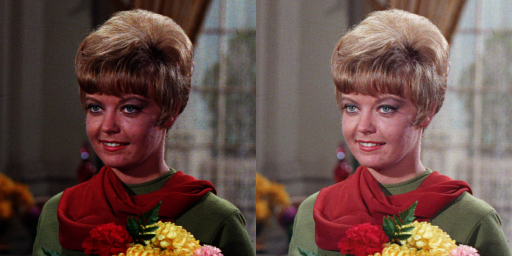

In [6]:
print('Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, Not a Number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


Simulasi Image Depth
------------------------
Masukkan nilai bit depth: 3


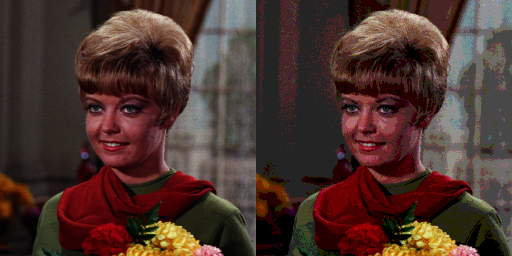

In [7]:
original = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print('Simulasi Image Depth')
print('------------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)


Nilai PSNR adalah  27.536073966869555 (dB)


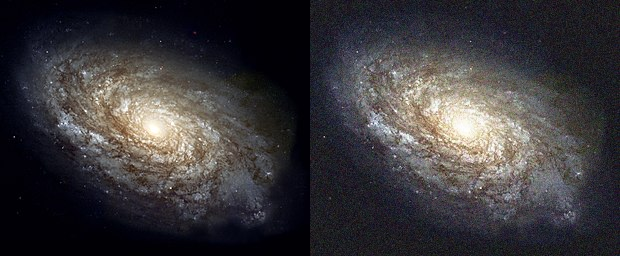

In [8]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Semester 6/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0 :
    pass
  else:
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20* log10(max_pixel / sqrt(mse))
  return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah ', psnr, '(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.524562543017744 (dB)


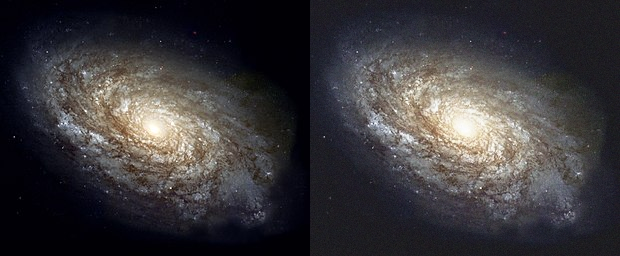

In [9]:
dst = cv_img[0]
noise_number = 29 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0: pass
  else : 
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah', psnr,'(dB)')
galaxy_frame = cv.hconcat((original,dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.49674877373203 (dB)


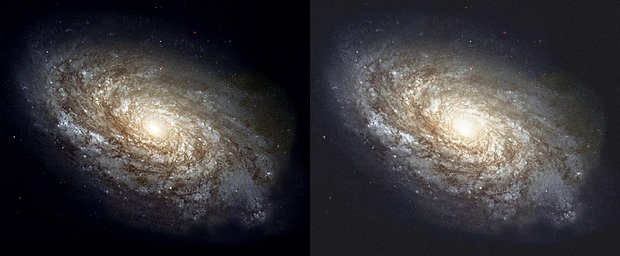

In [10]:
dst = cv_img[0]
noise_number = 59 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0: pass
  else : 
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah', psnr,'(dB)')
galaxy_frame = cv.hconcat((original,dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50847838662391 (dB)


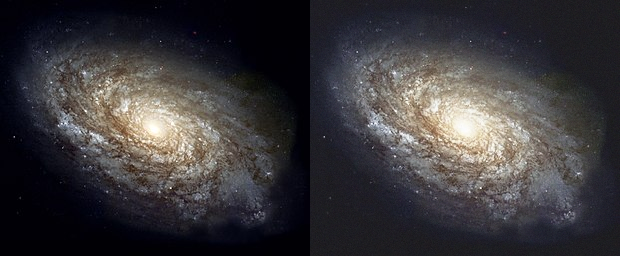

In [11]:
dst = cv_img[0]
noise_number = 79 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0: pass
  else : 
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah', psnr,'(dB)')
galaxy_frame = cv.hconcat((original,dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.514741068934295 (dB)


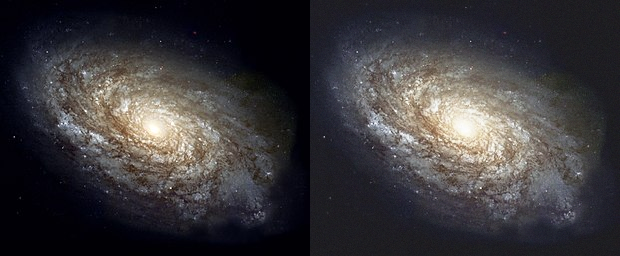

In [12]:
dst = cv_img[0]
noise_number = 99 # jumlah citra array yang di average
for i in range(noise_number):
  if i == 0: pass
  else : 
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah', psnr,'(dB)')
galaxy_frame = cv.hconcat((original,dst))
cv2_imshow(galaxy_frame)

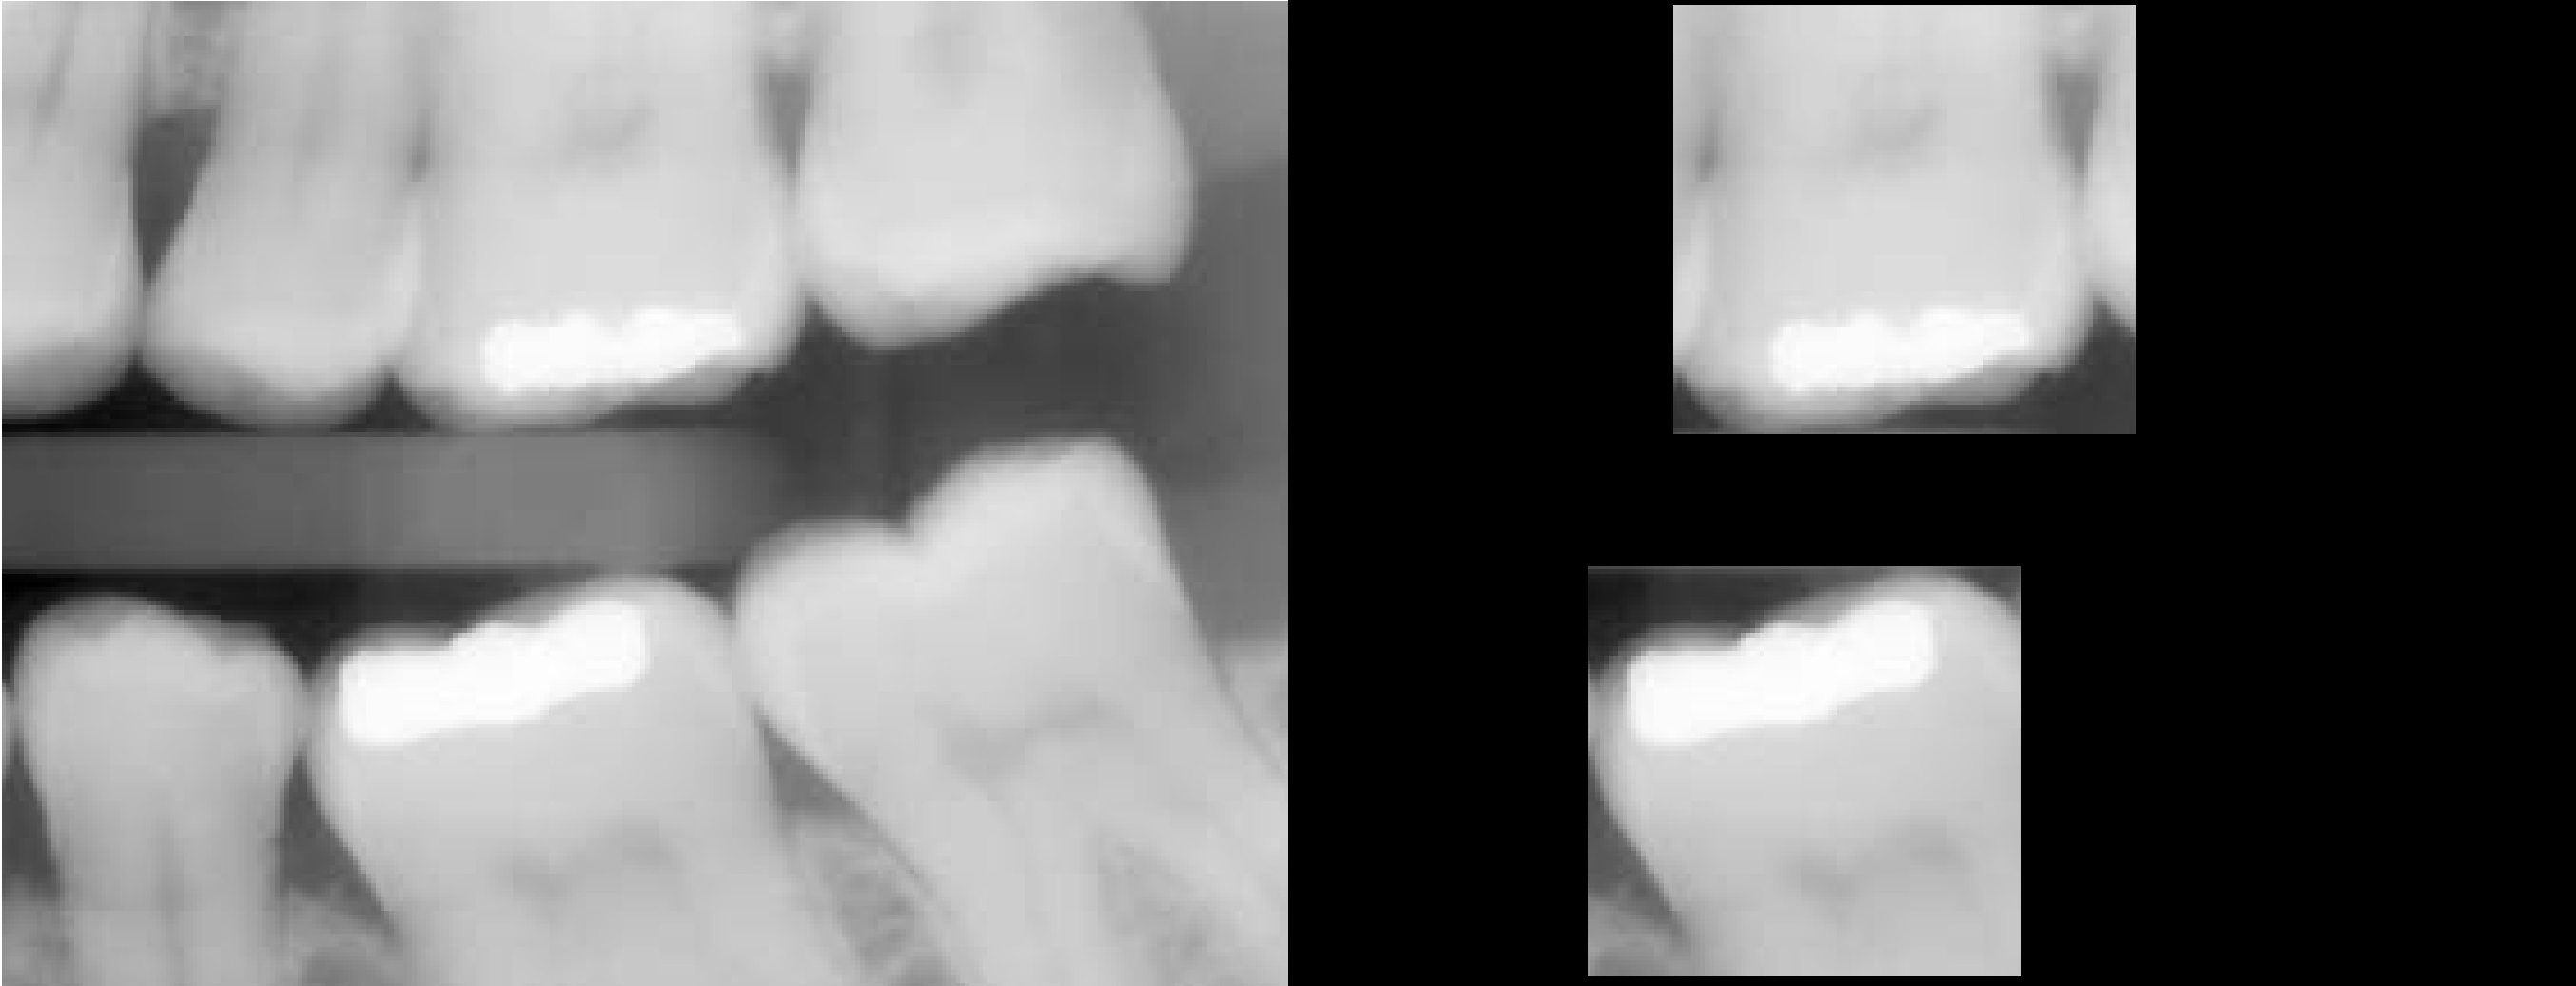

In [13]:
img_teeth = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/teeth.jpg')

mask = np.zeros(img_teeth.shape, dtype=np.uint8)
mask = cv.rectangle(mask, pt1=(315,595), pt2=(770,1025), color = (255,255,255), thickness = -1)

result = img_teeth & mask

mask1 = cv.rectangle(mask, pt1 = (405,5), pt2 = (890,455), color = (255,255,255), thickness = -1)

result = img_teeth & mask1

teeth_frame = cv.hconcat((img_teeth, result))
cv2_imshow(teeth_frame)

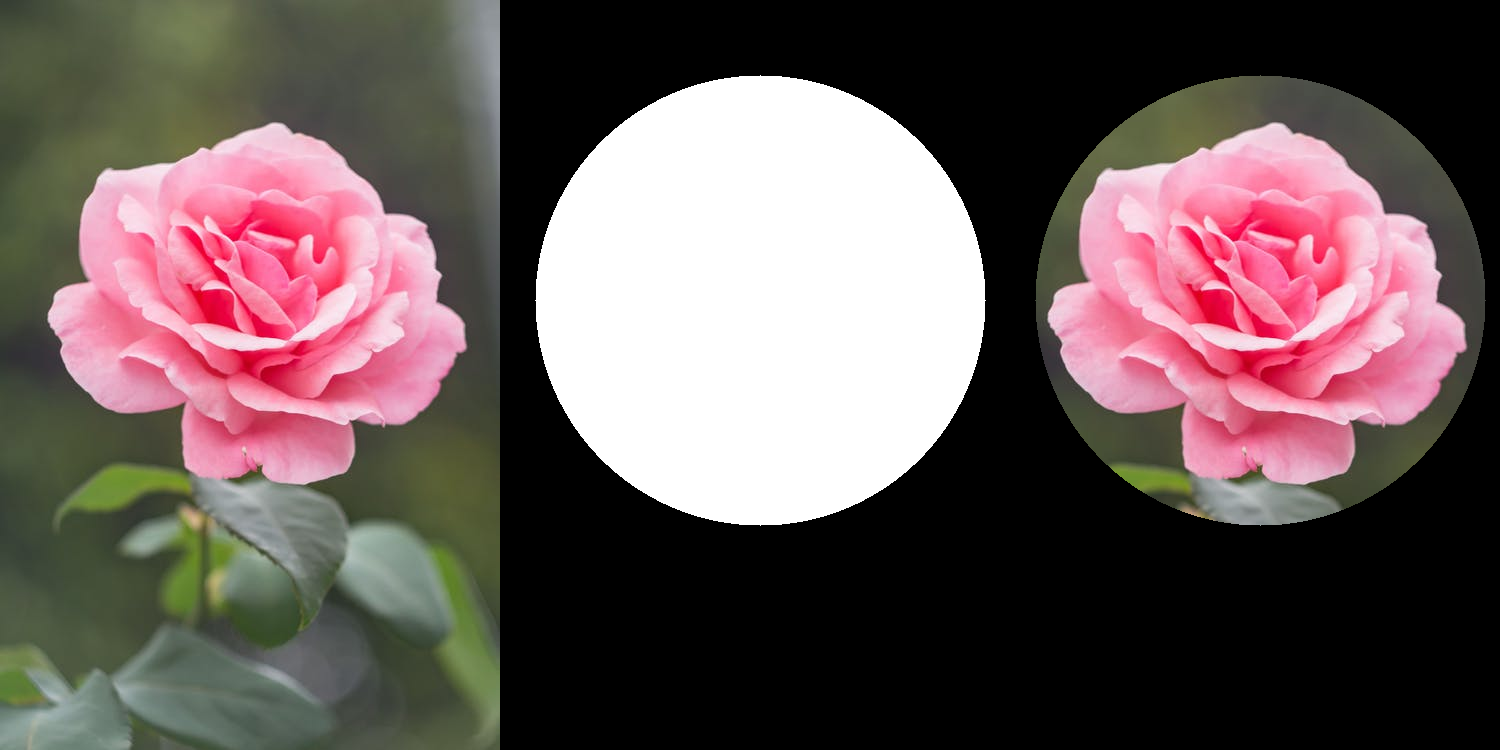

In [17]:

img_rose = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

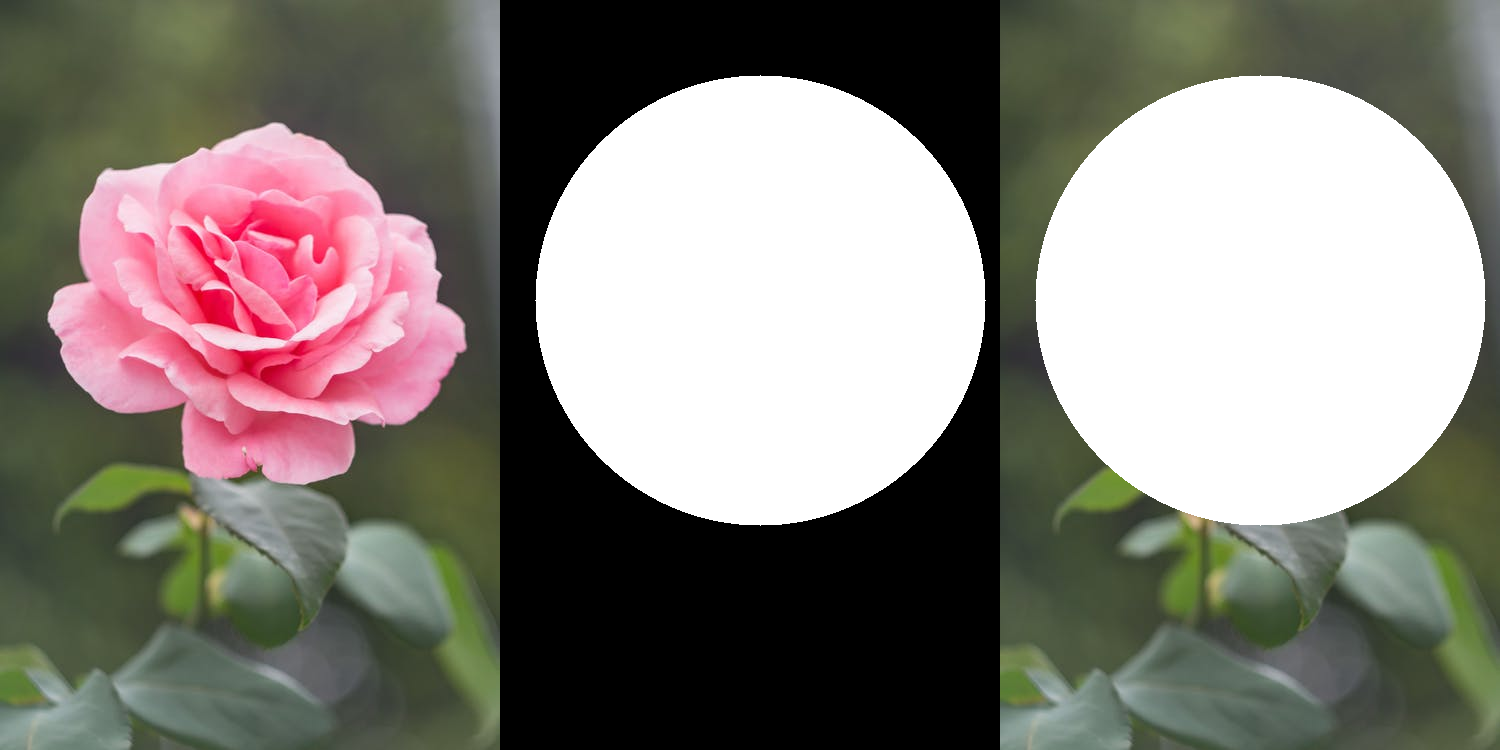

In [18]:

img_rose = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

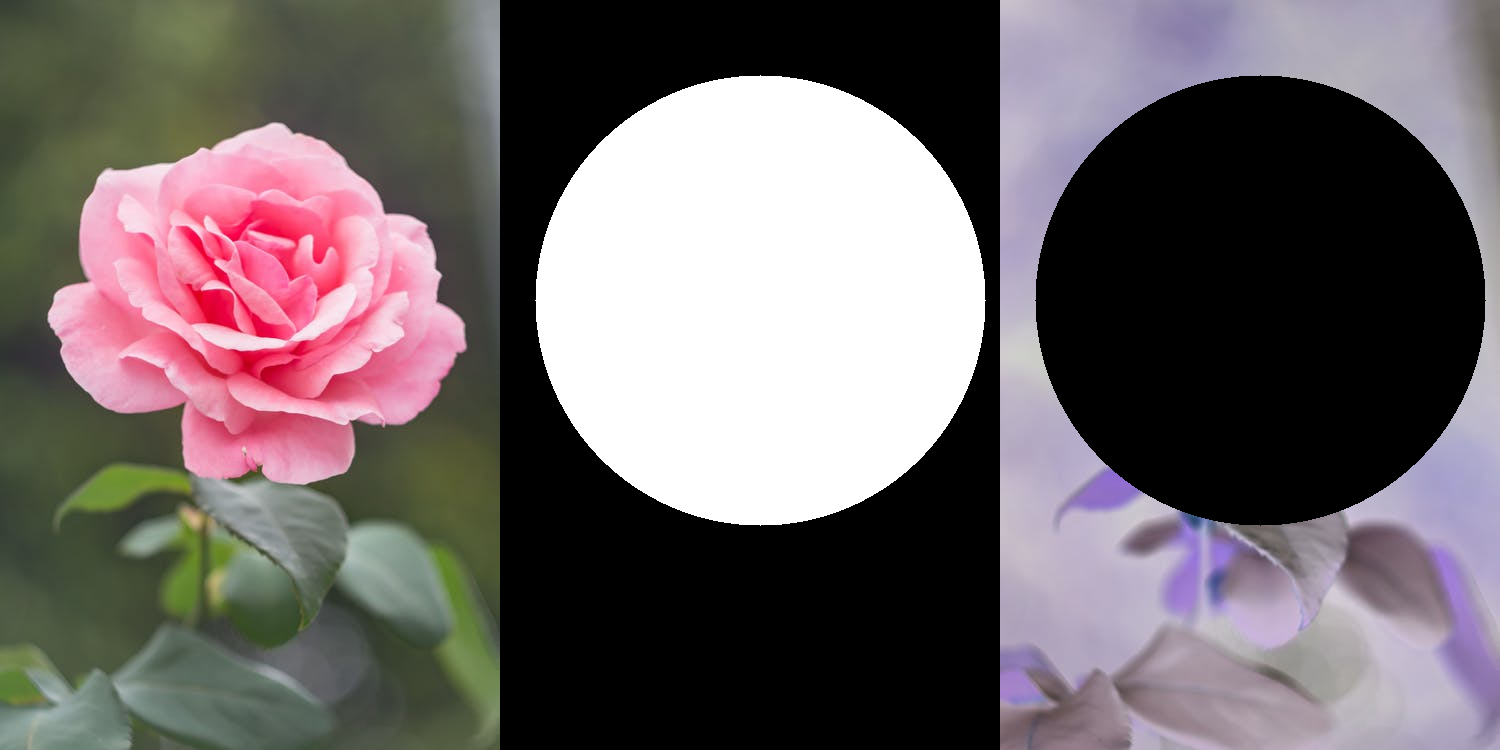

In [19]:

img_rose = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

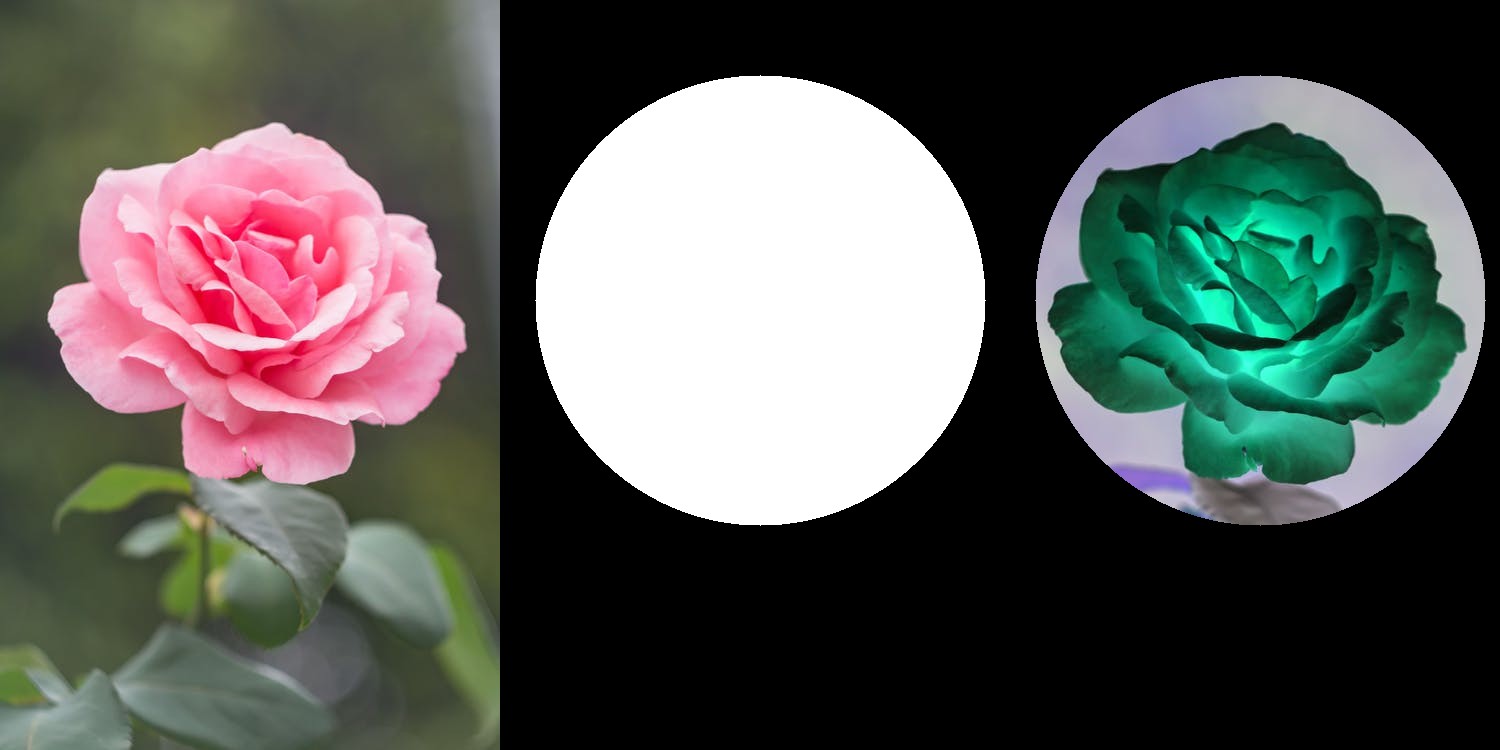

In [20]:

img_rose = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

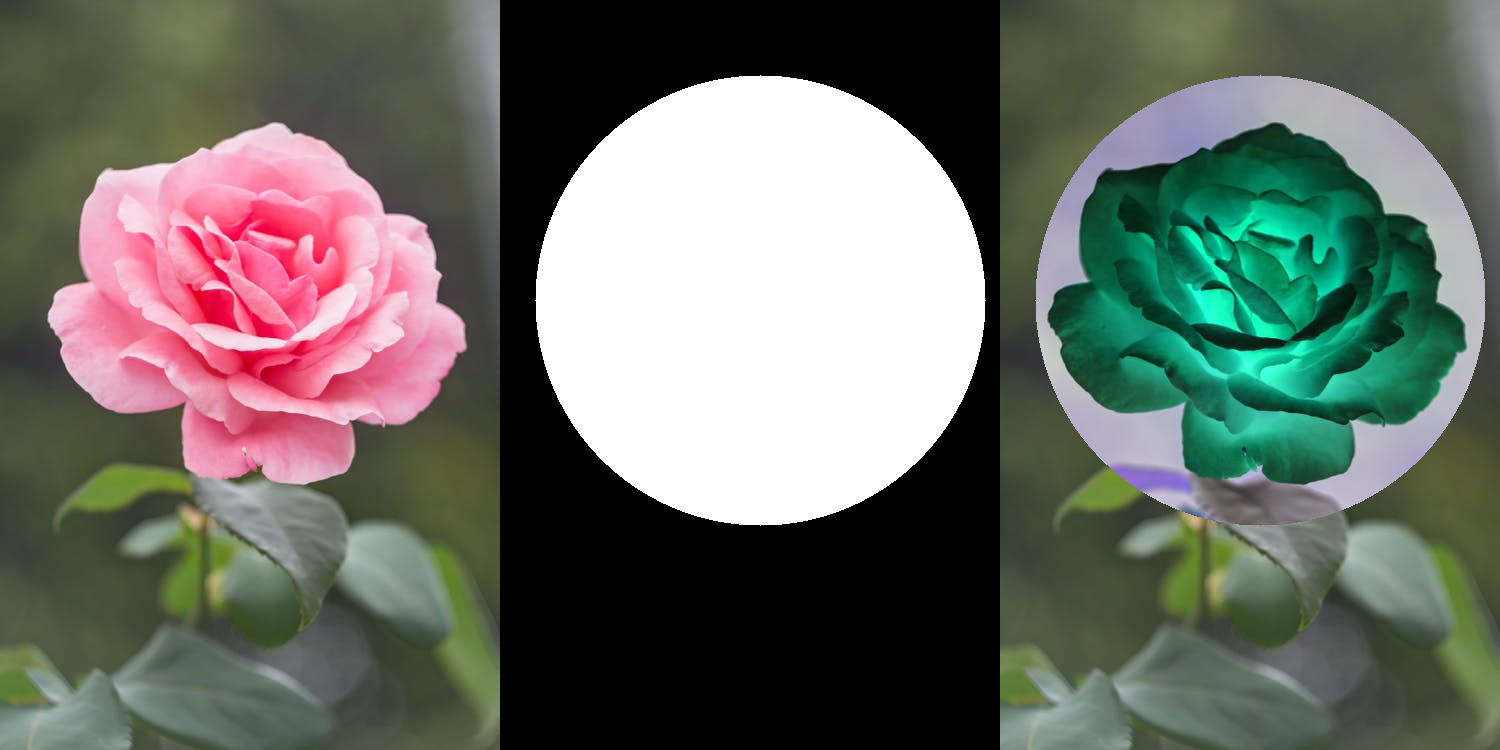

In [21]:

img_rose = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)